# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will build multi-class classification models to predict the type of `"crop"` and identify the single most importance feature for predictive performance.

In [1]:
# All required libraries are imported here for you.
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Write your code here
crops.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [2]:
#check for missing values
crops.isna().sum()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

In [3]:
#check crop types
crops['crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [4]:
#Check the number of classes
crops['crop'].nunique()

22

array([[<AxesSubplot: title={'center': 'N'}>,
        <AxesSubplot: title={'center': 'P'}>],
       [<AxesSubplot: title={'center': 'K'}>,
        <AxesSubplot: title={'center': 'ph'}>]], dtype=object)

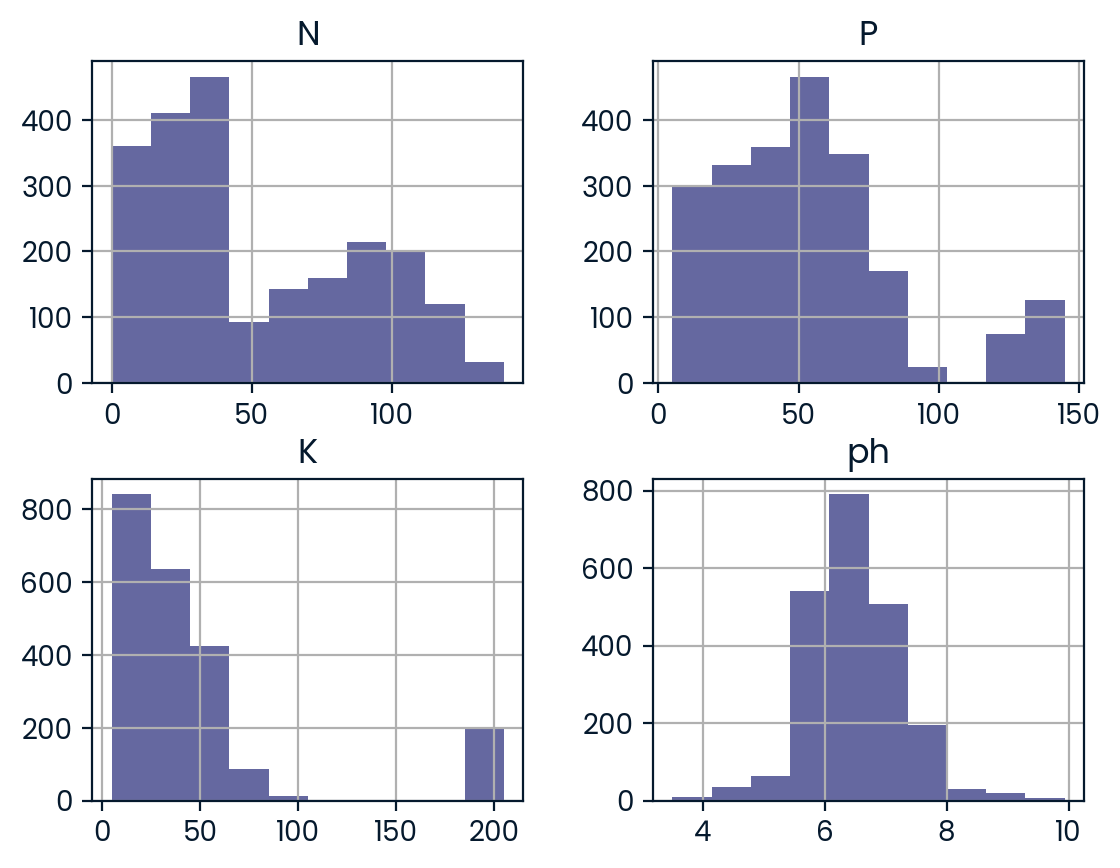

In [5]:
#Exploring the features distribution for scaling
crops[['N','P','K','ph']].hist()

In [6]:
X= crops.drop("crop",axis=1).values
y= crops['crop'].values

In [7]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


array([[<AxesSubplot: title={'center': '0'}>,
        <AxesSubplot: title={'center': '1'}>],
       [<AxesSubplot: title={'center': '2'}>,
        <AxesSubplot: title={'center': '3'}>]], dtype=object)

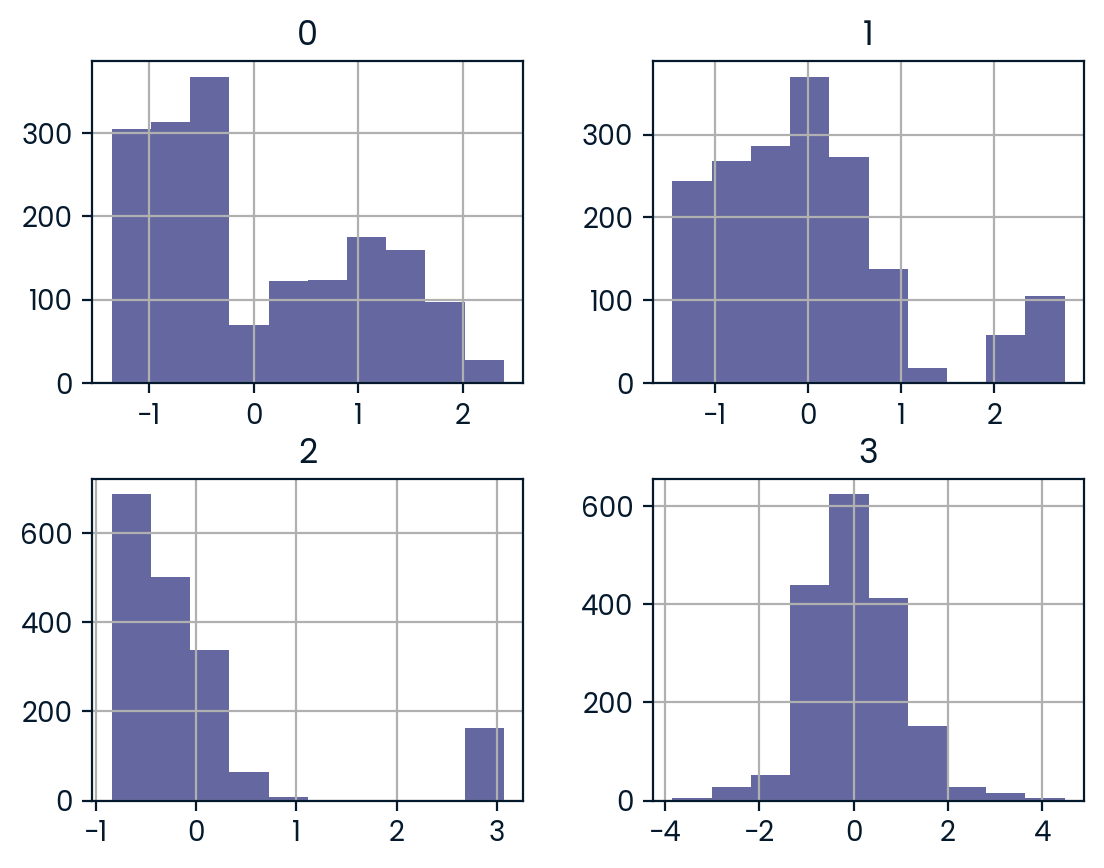

In [8]:
#Feature scalling on train and test sets
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the numpy array to a DataFrame to use the hist method
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_train_scaled_df.hist()

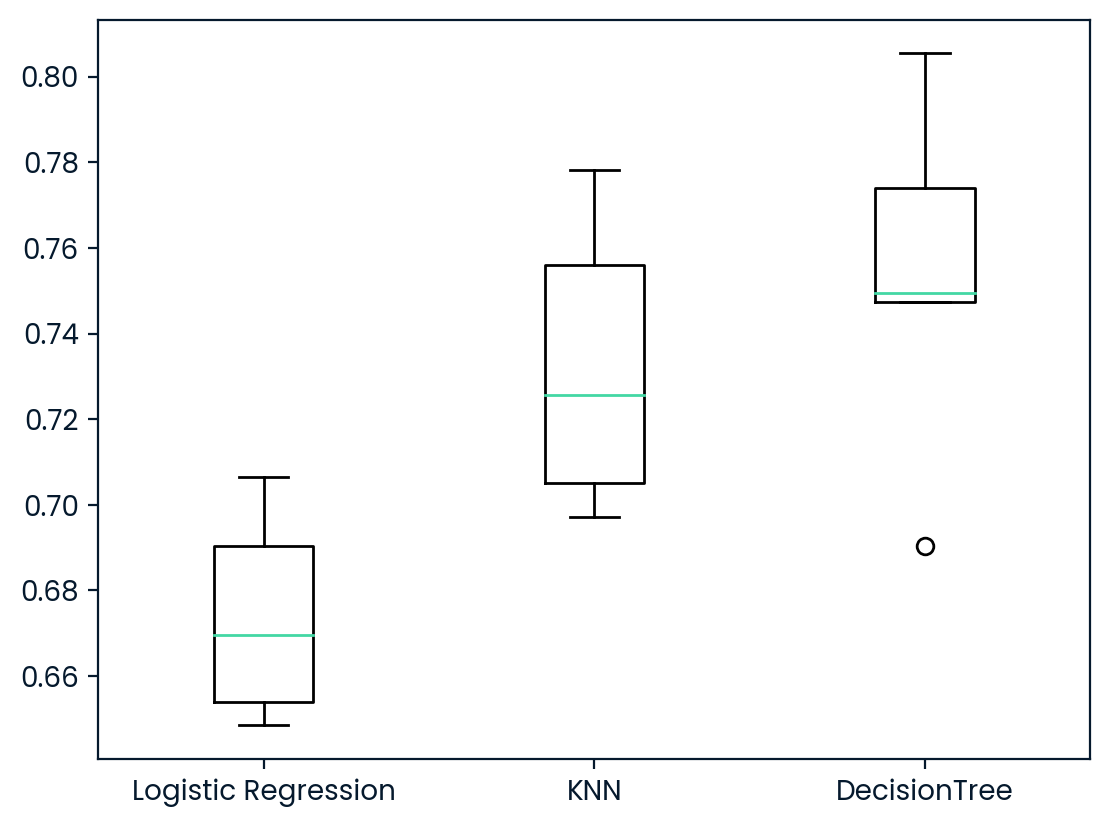

In [9]:
#Model selction 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt

models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "DecisionTree": DecisionTreeClassifier()}
results = []
kf = KFold(n_splits=6, random_state=42, shuffle=True)
for model in models.values():
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

In [10]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print("{} Test Set Accuracy: {}".format(name, test_score))

Logistic Regression Test Set Accuracy: 0.6590909090909091
KNN Test Set Accuracy: 0.7386363636363636
DecisionTree Test Set Accuracy: 0.7681818181818182


In [11]:
#Feature selection using Logistic Regression based on F1 Score for each feature
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

features = crops.iloc[:,0:4].columns
feature_order_dict = {col: i for i, col in enumerate(features)}
feature_f1_scores = {}

for feature, order in feature_order_dict.items():
    model = LogisticRegression(multi_class='multinomial')
    model.fit(X_train_scaled[:, order].reshape(-1, 1), y_train)
    predictions = model.predict(X_test_scaled[:, order].reshape(-1, 1))
    f1 = f1_score(y_test, predictions, average='weighted')
    feature_name = f"Feature_{feature}"  # Replace with actual feature names
    feature_f1_scores[feature_name] = f1

# Now feature_f1_scores contains the F1 scores for each feature
print(feature_f1_scores)


{'Feature_N': 0.10689900116508289, 'Feature_P': 0.08426955444720076, 'Feature_K': 0.13831456375684123, 'Feature_ph': 0.045464856528065166}


In [12]:

max_f1_score = max(feature_f1_scores.values())
Best_Feature = [key for key, value in feature_f1_scores.items() if value == max_f1_score][0]
Best_Feature

'Feature_K'

# Project Developing

## Classifing Crop Using KNN
Hyperparameter (K_neighbor) selection using **Simple Model *VS* Hyperparameter Tuning Model**

In [13]:
#Hyperparamter selection using a Simple KNN Model
from sklearn.metrics import accuracy_score
acc = {}
for k in range(1, 30, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc[k] = accuracy_score(y_test, y_pred)
    

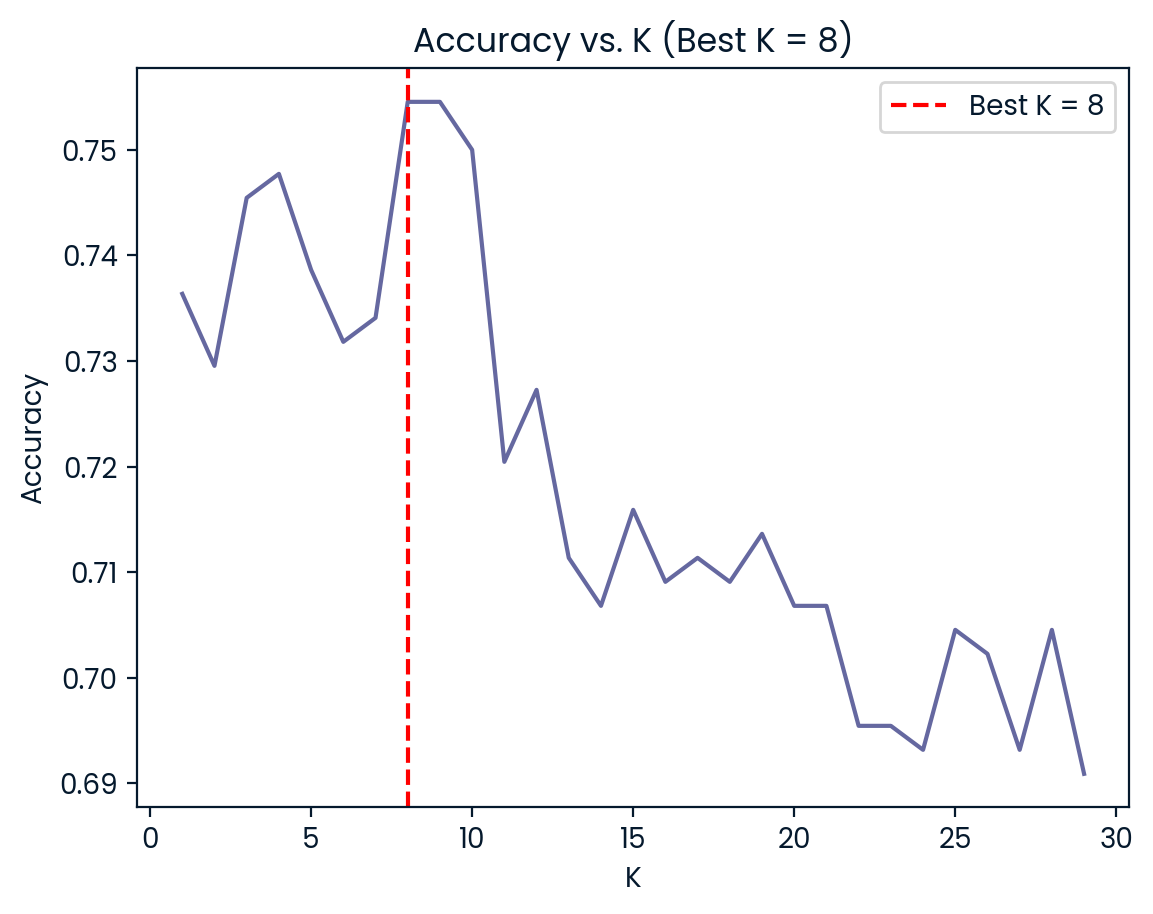

Best K: 8
Highest Accuracy: 0.7545454545454545


In [14]:
import matplotlib.pyplot as plt

best_k = max(acc, key=acc.get)
highest_accuracy = acc[best_k]
# Plotting K v/s accuracy graph
plt.plot(range(1, 30, 1), acc.values())
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title(f"Accuracy vs. K (Best K = {best_k})")

# Add a red line at the optimal K value
plt.axvline(x=best_k, color='red', linestyle='--', label=f"Best K = {best_k}")
plt.legend()
plt.show()
print(f'Best K: {best_k}')
print(f'Highest Accuracy: {highest_accuracy}')

In [15]:
#Hyperparameter selection using GridSearchCV Tuning Technique
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
import numpy as np

steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
parameters = {"knn__n_neighbors": np.arange(1, 30)}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)
print(cv.best_score_)
print(cv.best_params_)

0.7335227272727273
{'knn__n_neighbors': 5}


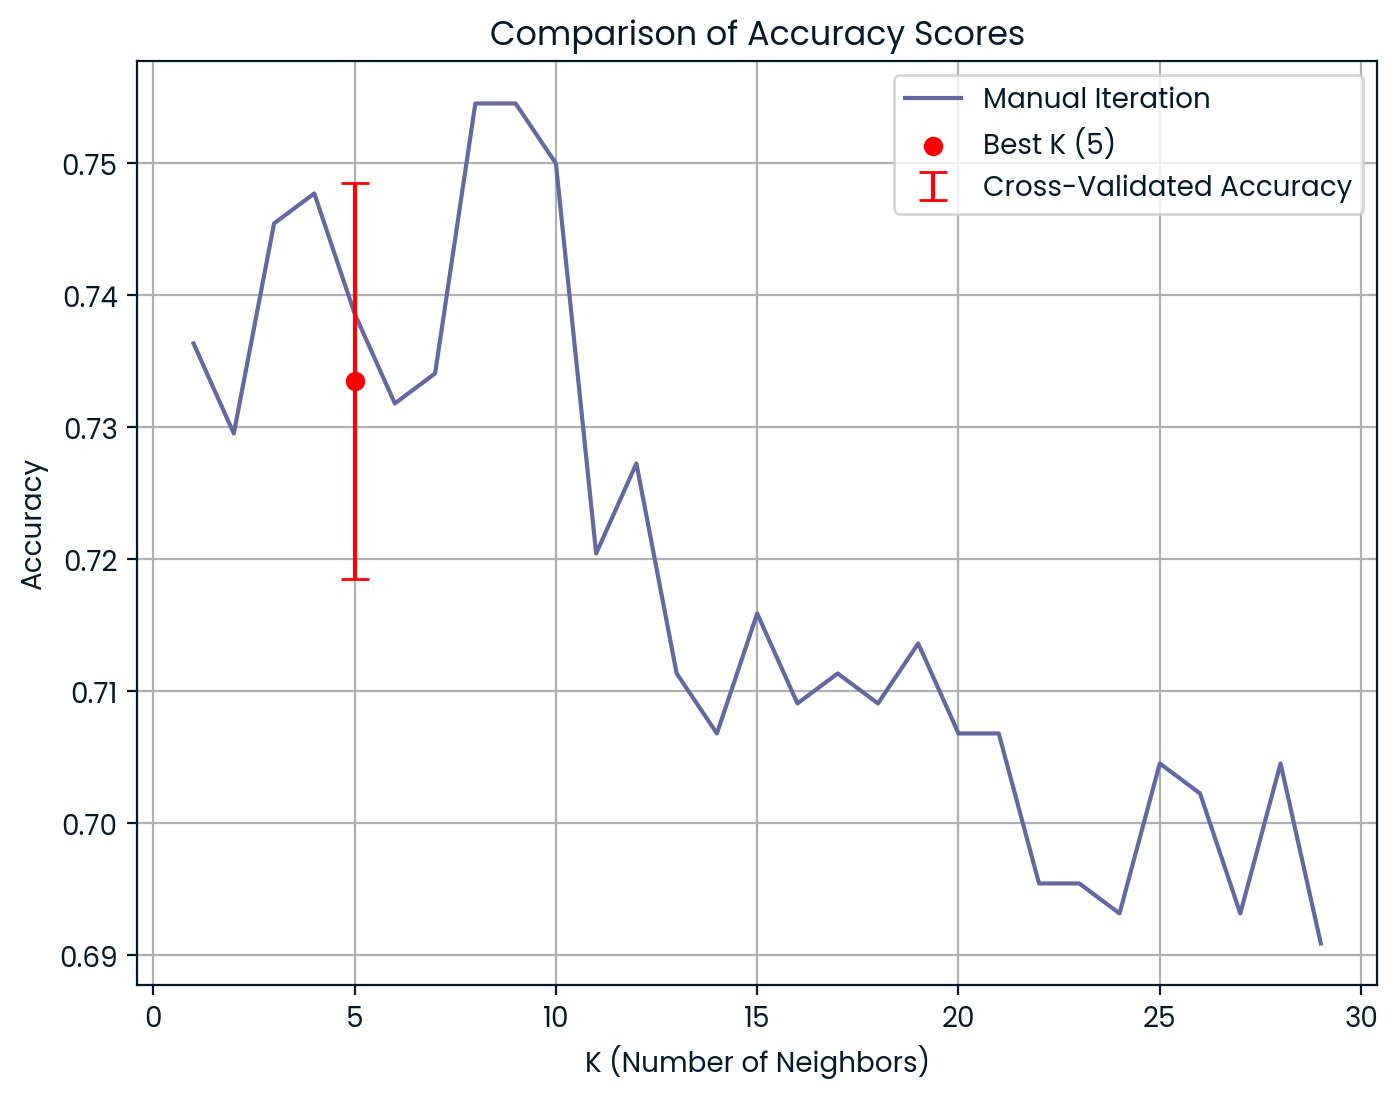

In [16]:

# Accuracy scores from manual iteration 
manual_k_values = list(acc.keys())
manual_accuracy_scores = list(acc.values())

# Best k value from hyperparameter tuning using GidSearchCV
best_k = cv.best_params_['knn__n_neighbors']
best_accuracy = cv.best_score_

# Create a line plot with error bars
plt.figure(figsize=(8, 6))
plt.plot(manual_k_values, manual_accuracy_scores, label='Manual Iteration')
plt.scatter(best_k, best_accuracy, color='red', marker='o', label=f'Best K ({best_k})')

# Add error bars for cross-validated accuracy
plt.errorbar(best_k, best_accuracy, yerr=cv.cv_results_['std_test_score'][cv.best_index_],
             color='red', capsize=5, linestyle='', label='Cross-Validated Accuracy')

plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy Scores')
plt.legend()
plt.grid(True)
plt.show()



### You might be wondring how the best hyperparameter K from GridsearchCV results a lower accuracy than the manual feature selection from itteration?
- It's due to **Variance-Bais Trade-Off** , usually the higher number of neighbors makes the model more complex which might cause overfitting (low bais/high variance) so the model starts capturing the noise on the train data and performs poorly on the test data , so by splitting the data into k-folds or performing **Cross_Validation** or **GridSearchCV**  will improve the trade off and make the model more generalized on the unseen data 

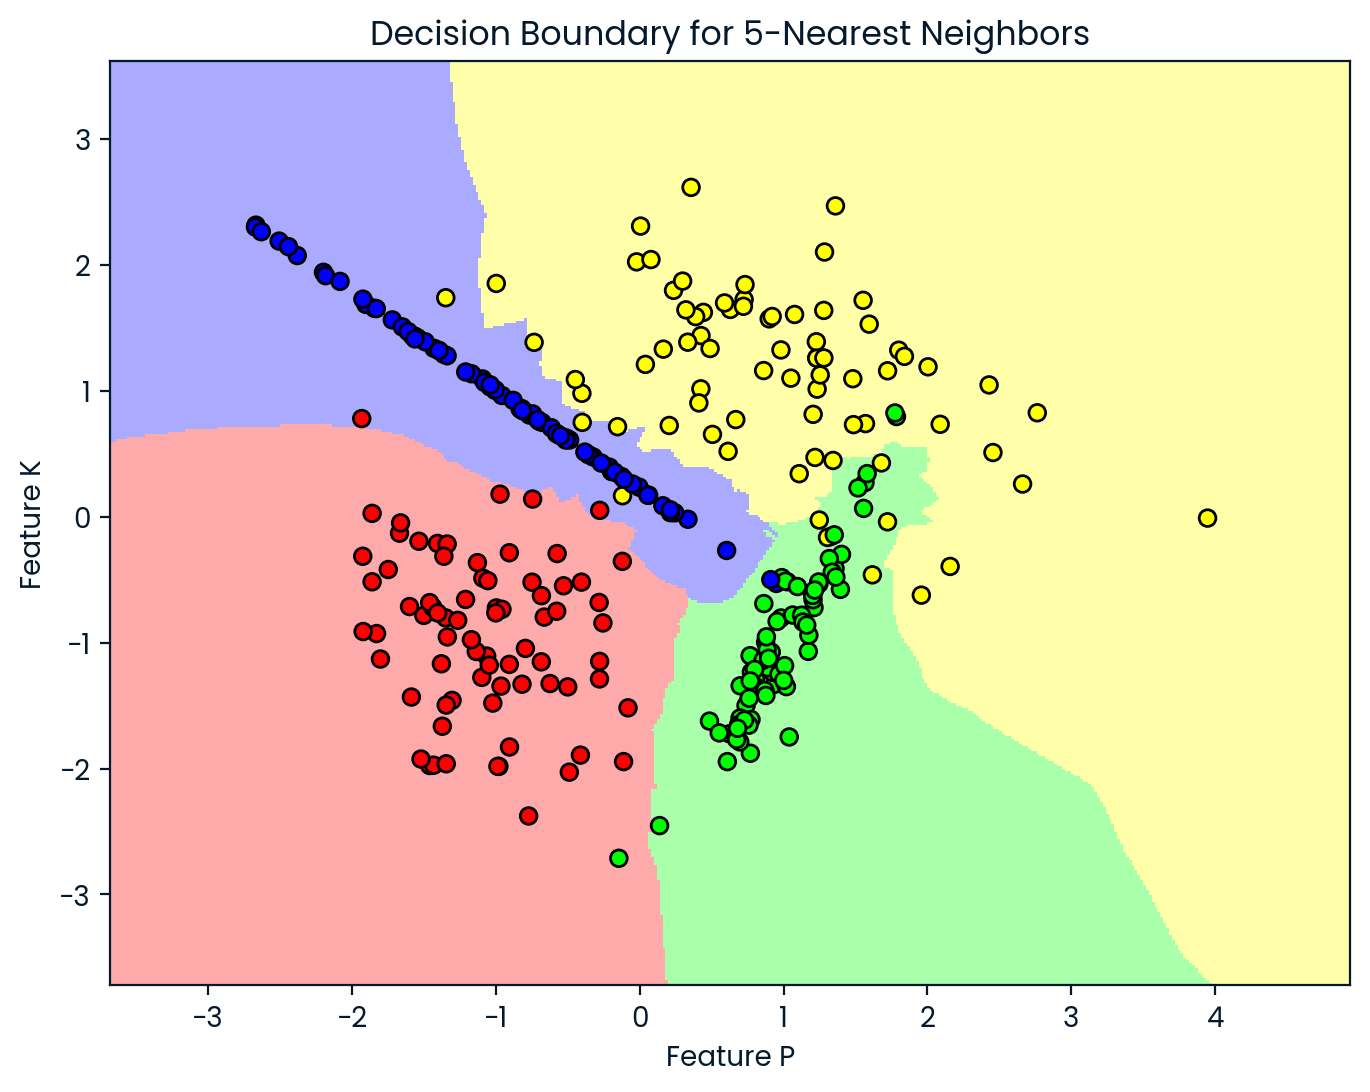

In [17]:
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap

# Generate classification data
X_train_scaled, y_train = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, n_classes=4, n_clusters_per_class=1, random_state=42)

# Create a meshgrid
h = 0.02  # Step size in the mesh
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Train kNN model (use your own trained model)
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train_scaled, y_train)

# Predict class labels for each point in the meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create color maps for decision regions
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFFF00'])

# Plot decision boundary and training data
plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=cmap_bold, edgecolors='k')
plt.xlabel('Feature P')
plt.ylabel('Feature K')
plt.title('Decision Boundary for 5-Nearest Neighbors')
plt.show()

In [286]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1  = f1_score(y_test, y_pred, average='weighted')
print(f"precision KNN with tuned model: {precision:.2f}")
print(f"recall KNN with tuned model: {recall:.2f}")
print(f"f1 KNN with tuned model: {f1:.2f}")

NameError: name 'precision_score' is not defined

## Decision Tree Algorithm

In [287]:
X_train, X_test, y_train, y_test = train_test_split(crops.drop(columns={'crop'}).values, crops['crop'].values, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=5)  # Adjust max_depth as needed
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5)

In [288]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.38


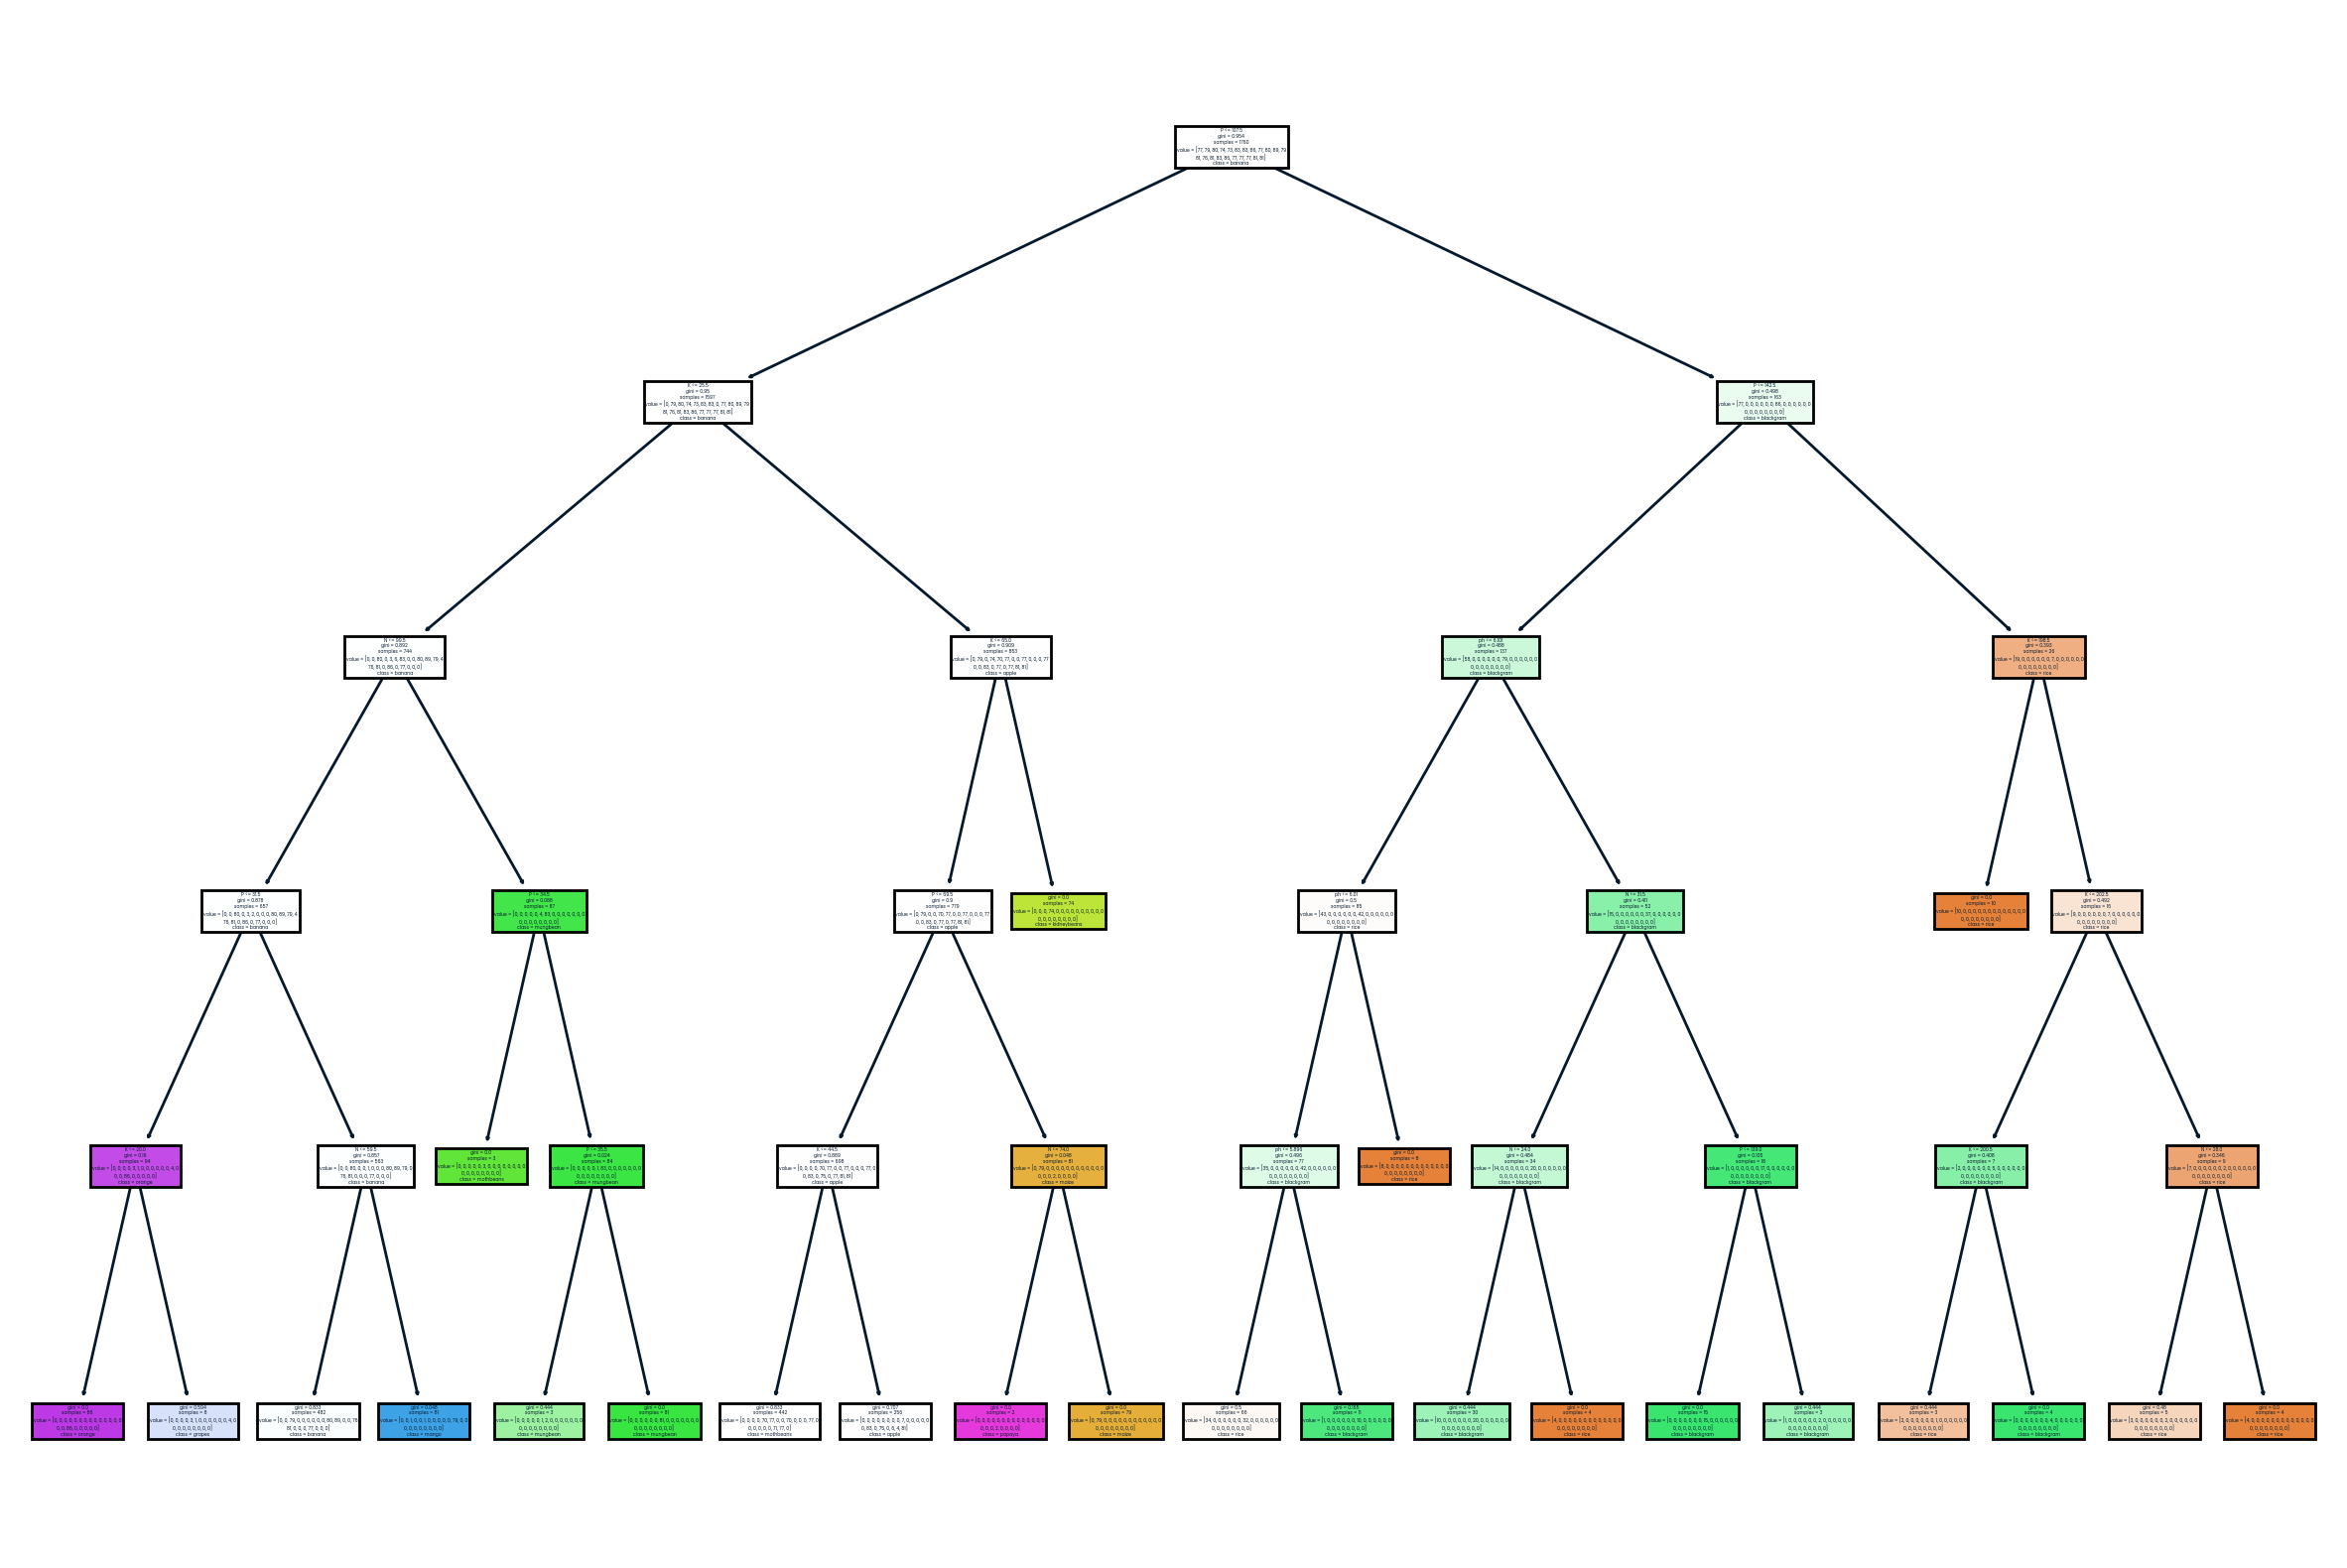

In [289]:
from sklearn.tree import plot_tree
crop_names = crops['crop'].unique()
feature_names= crops.columns
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=feature_names, class_names=crop_names, filled=True)
plt.show()

In [290]:
X_train, X_test, y_train, y_test = train_test_split(crops.drop(columns={'crop'}).values, crops['crop'].values, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Define hyperparameters to search
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [4, 10, 15],
    'min_samples_leaf': [3, 4, 8],
    'criterion': ['gini', 'entropy']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the final model with the best hyperparameters
final_clf = DecisionTreeClassifier(**best_params)
final_clf.fit(X_train, y_train)

# Evaluate on the test set
accuracy = final_clf.score(X_test, y_test)
print(f"Accuracy with tuned model: {accuracy:.2f}")

# Generate predictions for the test set
y_pred = final_clf.predict(X_test)

print (f"Best Parameters of tuned model: {best_params}")

Accuracy with tuned model: 0.78
Best Parameters of tuned model: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 15}


In [291]:
# Generate classification report

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"precision with tuned model: {precision:.2f}")
print(f"recall with tuned model: {recall:.2f}")
print(f"f1 with tuned model: {f1:.2f}")

precision with tuned model: 0.80
recall with tuned model: 0.78
f1 with tuned model: 0.77
